In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded=files.upload()


Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [5]:
airlines=pd.read_excel("Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


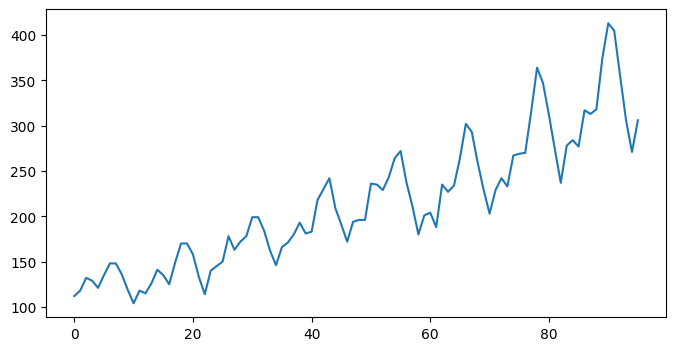

In [8]:
indigo = pd.read_excel("Airlines+Data.xlsx")
indigo.Passengers.plot(figsize=(8,4));

In [9]:
indigo.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [10]:
airlines.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [15]:
airlines.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [16]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using
# Date functions from pandas

airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

#airlines["Day"] = airlines.Date.dt.strftime("%d") # Day extraction
#airlines["wkday"] = airlines.Date.dt.strftime("%A") # weekday extraction

In [17]:
airlines.head()

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995


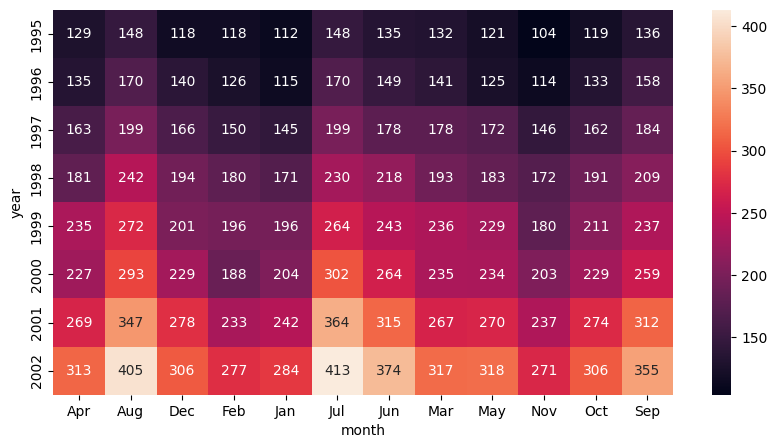

In [18]:
plt.figure(figsize=(10,5))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g"); #fmt is format of the grid values

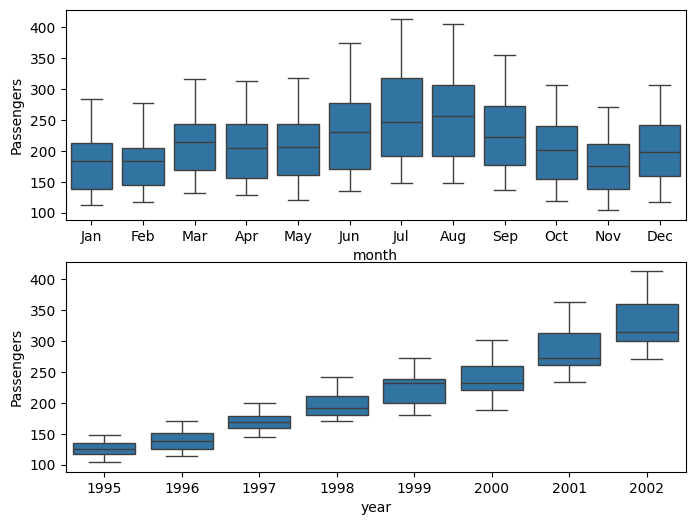

In [21]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlines);
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlines);


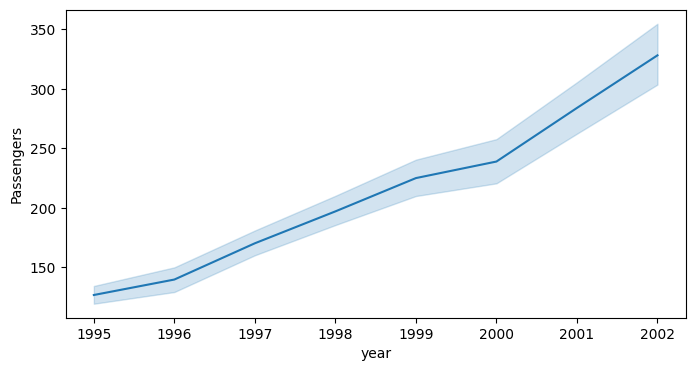

In [41]:
plt.figure(figsize=(8,4))
sns.lineplot(x="year",y="Passengers",data=airlines);

In [42]:
airlines

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


**Moving** **Average**

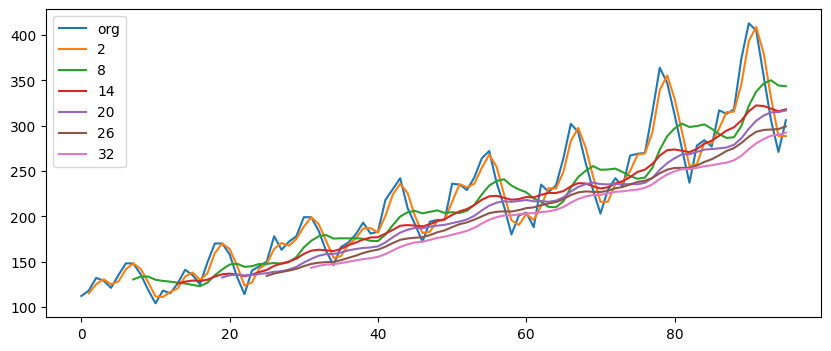

In [54]:
plt.figure(figsize=(10,4))
airlines.Passengers.plot(label="org")
for i in range(2,34,6):
   airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

In [48]:
final_df = pd.read_excel("Airlines+Data.xlsx")
final_df['Date'] = pd.to_datetime(final_df.Month,format="%b-%y")
final_df['month'] = final_df.Date.dt.strftime("%b") #month extraction
final_df['year'] = final_df.Date.dt.strftime("%y")

In [50]:
final_df = pd.get_dummies(final_df, columns = ['month'])

In [51]:
from typing_extensions import final
t= np.arange(1,97)
final_df['t']= t
final_df['t_square']= (t *t)
log_Passengers=np.log(final_df['Passengers'])
final_df['log_Passengers'] =log_Passengers
final_df

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,02,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


Splitting data


In [44]:
Train=final_df.head(84)
Test=final_df.tail(12)

In [47]:
Test

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,log_Passengers
84,2002-01-01,284,2002-01-01,02,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,2002-02-01,277,2002-02-01,02,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,2002-03-01,317,2002-03-01,02,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,2002-04-01,02,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,2002-05-01,02,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,2002-06-01,374,2002-06-01,02,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,2002-07-01,413,2002-07-01,02,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,2002-08-01,405,2002-08-01,02,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,02,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,02,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [52]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480278

In [53]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315654

In [54]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [59]:
#ASQ
add_sea_Quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612095726

In [61]:
#Additive seasonality

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.8197848142182

In [62]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['log_Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

185.81276884781897

In [63]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['log_Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

321.9469406141984

In [64]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,185.812769
6,rmse_Mult_add_sea,321.946941


In [65]:
#ADDITIVE SEASONALITY HAS THE BEST ACCURACY
model_final = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
pred_new  = pd.Series(model_final.predict(Test))
pred_new

84    282.098895
85    283.691568
86    311.712813
87    306.305487
88    306.326732
89    331.062262
90    356.797793
91    356.676181
92    332.268854
93    307.861528
94    285.311344
95    310.332589
dtype: float64

In [67]:
predict_data= pd.DataFrame()
predict_data["forecasted_passengers"] = pd.Series(pred_new)
forecast = pd.concat([Train,predict_data])
forecast

,Month,Passengers,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_square,log_Passengers,forecasted_passengers
0,1995-01-01,112.0,1995-01-01,95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.718499,NaN
1,1995-02-01,118.0,1995-02-01,95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.770685,NaN
2,1995-03-01,132.0,1995-03-01,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,4.882802,NaN
3,1995-04-01,129.0,1995-04-01,95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,4.859812,NaN
4,1995-05-01,121.0,1995-05-01,95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,25.0,4.795791,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.676181
92,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.268854
93,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.861528
94,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.311344


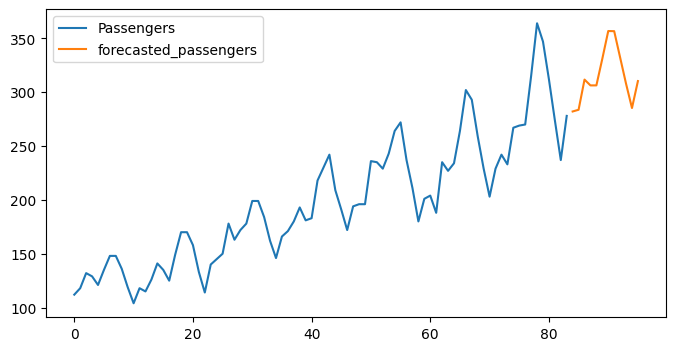

In [69]:
forecast[['Passengers','forecasted_passengers']].reset_index(drop=True).plot(figsize=(8,4));